In [2]:
# ПЕРВИЧНАЯ НАСТРОЙКА
print("ПЕРВИЧНАЯ НАСТРОЙКА")
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import IPython.display as ipyd
ipyd.clear_output(wait=False)

# 3 - Движение частицы в поле плоского конденсатора
Частица влетает в поле конденсатора параллельно пластинам вдоль оси конденсатора. Частица имеет массу $m$ и заряд $q$ (знак не определен). Под действием поля конденсатора частица отклоняется к одной из пластин (в зависимости от знака заряда) и к концу пути попадает на неё. Координату, где упала частица можно измерить. Известны также расстояние между пластинами и напряжение на конденсаторе.<br>
Создать модель поведения частицы с возможностью изучения её траектории в зависимости от изменяемых параметров системы (масса, знак и модуль заряда частицы, расстояние между пластинами конденсатора, а также другие параметры являются входными данными для задачи).<br>
Определить закон, по которому изменяется траектория движения частицы. Учесть влияние силы тяжести на частицу и визуализировать траекторию движения частицы в виде графика.

### Решение

> Настройки и сама симуляция ниже

Рассмотрим полную силу, действующую на частицу:<br>
$F = F_{Эл} + F_{Грав} = qE + mg = ma$<br>
Из неё, получаем ускорение:<br>
$a = \frac{qE}{m} + g = \frac{qV}{Dm} + g$<br>
Подставляем в формулу равноускоренного движения:<br>
$y(t) = \int\int a dt = v_{0y}t + \frac{at^2}{2}$<br>
Так как частица начинает движение на равной дистанции от обоих пластин,<br>то решаем уравнение: $y(t) = \frac{D}{2}$:<br>
$Disc = V_{0y}^2 + aD$<br>
$t_{кас} = \frac{-v_{0y} + \sqrt{Disc}}{at^2}$ (только плюс, так как с минусом будет $x\leq0$)<br>
С учётом угла $\alpha$, находим $v_0$ для каждой оси:<br>
$\begin{cases} v_{0x} = \cos(\alpha)v_0 \\ v_{0x} = \sin(\alpha)v_0 \end{cases}$<br>
Дальше решаем с конкретными числами, после чего находим $x$:<br>
$t_{кас} = \frac{x}{v_{0x}} \to x_{кас} = v_{0x}t_{кас}$

In [119]:
# НАСТРОЙКИ СИМУЛЯЦИИ
# Масса частицы [кг]
#m  = 2e-27
m = 2e-27
# Заряд частицы [кл]
q  = 1.6e-19
# Начальная скорость частицы [м/с]
v0 = 50000
# Расстояние между пластинами [м]
D  = 0.2
# Напряжение на конденсаторе [В]
V = 10
# Знак верхней пластины, 1 - положительный, -1 - отрицательный
top_plate = -1
# Длина конденсатора [м] (-1 - бесконечность)
x_lim = 0.6
# Угол, под которым заряд влетает
angle0 = -10

In [120]:
# ФОРМУЛЫ
g = 9.8
v0x = np.cos(np.deg2rad(angle0))*v0
v0y = np.sin(np.deg2rad(angle0))*v0

# 1 - вверх, -1 - вниз
direction = -1 if (np.sign(q) == np.sign(top_plate)) else 1

# По оси y
a = direction*(abs(q)*V)/(m*D) - g

def y_t(t: float) -> float:
    global a, v0y
    return a*t*t/2 + v0y*t

def y_x(x: float) -> float:
    global v0x, y_t
    return y_t(x/v0x)

discr = np.sqrt(v0y**2 + a*D*direction)
t_kaboom = max((-v0y+discr)/(a), (-v0y-discr)/(a))
x_kaboom = t_kaboom*v0x

if (x_lim < 0):
    x_lim = x_kaboom

ipyd.display(ipyd.Math( f"x_{{кас}} = {x_kaboom} \\text{{ м}}" ))
ipyd.display(ipyd.Math( f"t_{{кас}} = {t_kaboom} \\text{{ с}}" ))
if (x_lim < x_kaboom):
    ipyd.display(ipyd.Markdown("Заряд не падает!"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# График

In [7]:
# НАСТРОЙКИ ГРАФИКА
# Разрешение кривой по оси x
step = 0.01
# Отступы по осям (x,y)
padding = (0.05, 0.05)

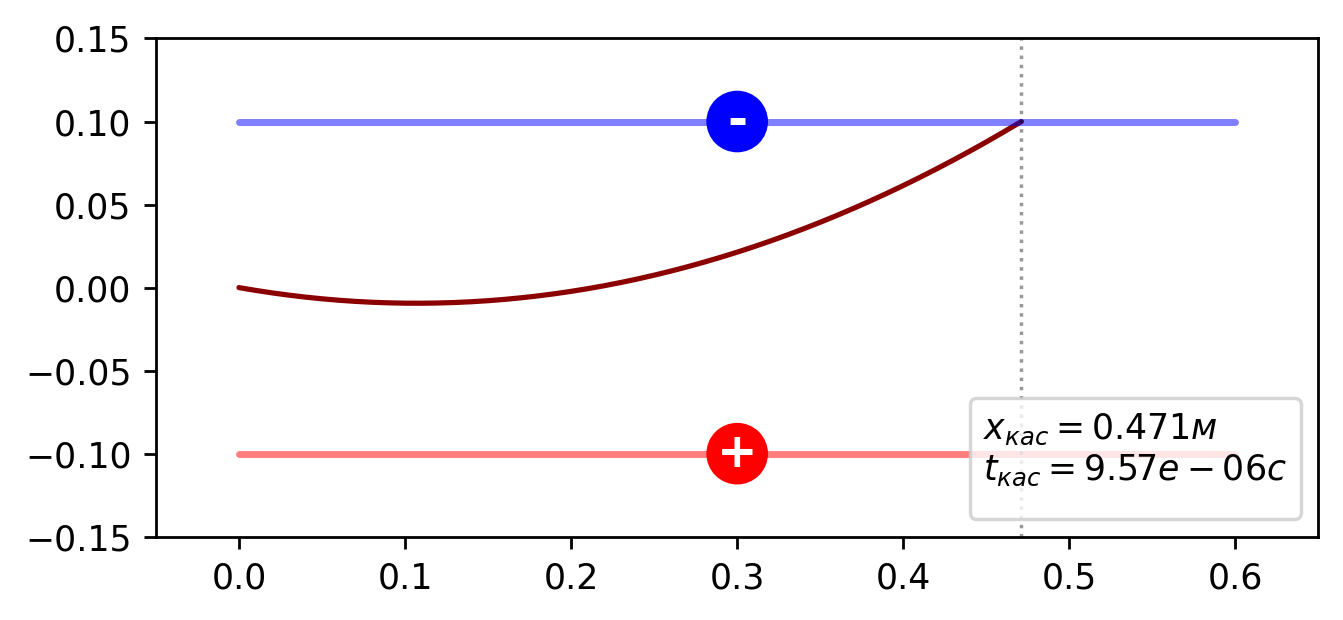

In [121]:
# ГРАФИК
# Initial setup
plt.figure(dpi=250)
plt.ylim(-D/2-padding[1],D/2+padding[1])
plt.xlim(0-padding[0], x_lim+padding[0])

# Graph
x_coords = [0]
while x_coords[-1] <= min(x_kaboom, x_lim):
    x_coords.append(x_coords[-1] + step)
x_coords[-1] = min(x_kaboom, x_lim)
y_coords = [y_x(x) for x in x_coords]
line_color = "darkred" if q > 0 else "darkblue"
plt.plot(x_coords, y_coords, color=line_color, solid_capstyle='round')

# Condensers
cond_circ_rad = (x_lim+2*padding[0])*0.025
# Positive
plt.plot([0, x_lim], [top_plate*D/2, top_plate*D/2], color="r", alpha=0.5, linewidth=2, solid_capstyle='round')
plt.gca().add_patch(
    plt.Circle((x_lim/2, top_plate*D/2), radius=cond_circ_rad, color="r")
)
plt.text(x=(x_lim/2), y=top_plate*D/2, s="+", color="w", va="center", ha="center", weight="bold", fontsize=14)
# Negative
plt.plot([0, x_lim], [-top_plate*D/2, -top_plate*D/2], color="b", alpha=0.5, linewidth=2, solid_capstyle='round')
plt.gca().add_patch(
    plt.Circle((x_lim/2, -top_plate*D/2), radius=cond_circ_rad, color="b")
)
plt.text(x=(x_lim/2), y=-top_plate*D/2, s="-", color="w", va="center", ha="center", weight="bold", fontsize=14)

# Final touches
plt_title = ""
if (x_lim >= x_kaboom):
    plt_title = (
        r"$x_{кас}=" + f"{x_kaboom:.3g}м$\n" +
        r"$t_{кас}=" + f"{t_kaboom:.3g}c$"
    )
else:
    plt_title = "Заряд не падает!"

plt.plot([x_kaboom]*2,plt.ylim(), linestyle=":", linewidth=1, alpha=0.4, color="k")
plt.legend(
    title = plt_title,
    loc= "upper right" if y_coords[-1] < 0 else "lower right"
)
plt.gca().set_aspect(1)
ipyd.clear_output(wait=False)
plt.show()

# Heatmap
Показывает распределение кривых при разных углах (задаётся диапазоном)

In [6]:
# НАСТРОЙКИ HEATMAP
# Диапазон углов [градусы]
a_lim = (-15, 15)
# На сколько будет изменяться угол (градусы)
da = 0.01
# Шаг тепловой карты [м]
step = 0.0005
# Основание логарифма для цветовой функции
logbase = 1.1

########################################
x_res, y_res = int(x_lim//step)+1, int(D//step)+1
print(f"Разрешение тепловой карты: {x_res}x{y_res}")
print(f"Итераций: {int((a_lim[1]-a_lim[0])//da + 1)*y_res*x_res}")
if (int((a_lim[1]-a_lim[0])//da + 1)*y_res*x_res) > 10e10: print("Это может быть долго")

Разрешение тепловой карты: 1200x401
Итераций: 1443600000


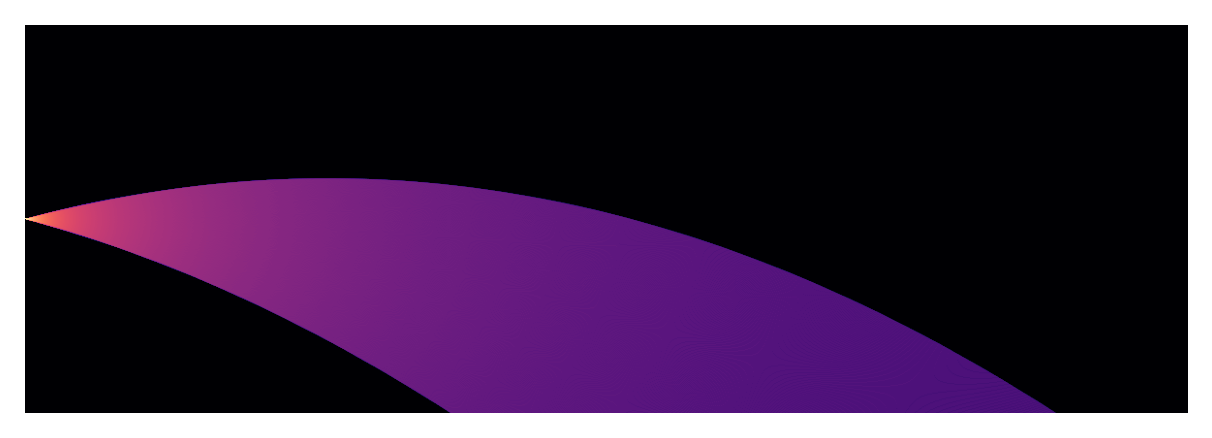

In [7]:
# СОЗДАНИЕ HEATMAP
plt.figure(dpi=250)

print("ПОДСЧЁТ ФУНКЦИЙ")
progress = ipyd.ProgressBar(int((a_lim[1]-a_lim[0])//da) + 1)
progress.display()

hmap = np.zeros((y_res, x_res))
for ai in range(int((a_lim[1]-a_lim[0])//da) + 1):
    ang = a_lim[0] + ai*da
    hm_v0x = np.cos(np.deg2rad(ang))*v0
    hm_v0y = np.sin(np.deg2rad(ang))*v0*(-top_plate)
    
    for xi in range(x_res):
        t = (step*xi)/hm_v0x
        y = a*t*t/2 + hm_v0y*t
        yi = int((y+D/2)//step)
        if (yi < 0 or yi >= y_res): continue
        hmap[yi][xi] += 1
    
    progress.progress += 1
    progress.update()

print("ВЗЯТИЕ ЛОГАРИФМА")
progress = ipyd.ProgressBar(x_res)
progress.display()
for xi in range(x_res):
    progress.progress += 1
    progress.update()
    for yi in range(y_res):
        if (hmap[yi][xi] == 0 or hmap[yi][xi] == 1): continue
        hmap[yi][xi] = math.log(hmap[yi][xi], logbase)
plt.gca().set_aspect(1)
plt.axis("off")
# Good picks: plasma, hot, magma
plt.imshow(hmap, cmap="magma") 
plt.gca().invert_yaxis()
ipyd.clear_output(wait=False)
plt.show()
